In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import beta


import pandas as pd
from scipy.stats import beta
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv("../../ImpactofAI/data/jt.data.2.JobOpenings", sep="\t")
df.columns = ["series_id", "year", "period", "value", "footnote_codes"]
df["series_id"] = df["series_id"].str.strip()

In [3]:
df["naics_code"] = df["series_id"].str.slice(3, 9)
df["state_code"] = df["series_id"].str.slice(9, 11)
df["area_code"] = df["series_id"].str.slice(11, 13)

In [4]:
df[df["year"].eq(2022) & df["series_id"].str.endswith("R") & df["period"].eq("M13")]

,series_id,year,period,value,footnote_codes,naics_code,state_code,area_code
50071,JTU000000000000000JOR,2022,M13,6.8,NaN,000000,00,00
50673,JTU000000010000000JOR,2022,M13,6.8,NaN,000000,01,00
51275,JTU000000020000000JOR,2022,M13,8.9,NaN,000000,02,00
51877,JTU000000040000000JOR,2022,M13,7.2,NaN,000000,04,00
52479,JTU000000050000000JOR,2022,M13,7.0,NaN,000000,05,00
...,...,...,...,...,...,...,...,...
100363,JTU900000000000000JOR,2022,M13,4.5,NaN,900000,00,00
100965,JTU910000000000000JOR,2022,M13,4.5,NaN,910000,00,00
101567,JTU920000000000000JOR,2022,M13,4.5,NaN,920000,00,00
102169,JTU923000000000000JOR,2022,M13,3.1,NaN,923000,00,00


In [5]:
naics_mapping = {
    11: "Agriculture, forestry, fishing and hunting",
    21: "Mining",
    22: "Utilities",
    23: "Construction",
    31: "Manufacturing",
    32: "Manufacturing",
    33: "Manufacturing",
    42: "Wholesale trade",
    44: "Retail trade",
    45: "Retail trade",
    48: "Transportation and warehousing",
    49: "Transporation and warehousing",
    51: "Information",
    52: "Finance and insurance",
    53: "Real estate and rental and leasing",
    54: "Professional, Scientific, and Technical Services",
    55: "Management of Companies and Enterprises",
    56: "Administrative and support and waste management and remediation services",
    61: "Education services",
    62: "Health care and social assistance",
    71: "Arts, entertainment, and recreation",
    72: "Accommodation and food services",
    81: "Other services, except public administration",
    92: "Public administration",
}


In [108]:
sector_name = {
    "Accommodation and food services": "Accommodation and food services",
    "Administrative and support and waste management and remediation services": "Administrative and support",
    "Agriculture, forestry, fishing and hunting": "Agriculture",
    "Arts, entertainment, and recreation": "Arts",
    "Construction": "Construction",
    "Education services": "Education",
    "Finance and insurance": "Finance and insurance",
    "Health care and social assistance": "Healthcare",
    "Information": "Information technology",
    "Manufacturing": "Manufacturing",
    "Mining": "Mining",
    "Other services, except public administration": "Other services",
    "Professional, Scientific and Technical Services": "Professional, Scientific and Technical Services",
    "Public administration": "Public administration",
    "Real estate and rental and leasing": "Real estate",
    "Retail trade": "Retail trade",
    "Transportation and warehousing": "Transportation and warehousing",
    "Utilities": "Utilities",
    "Wholesale trade": "Wholesale trade",
}

In [109]:
occupations = pd.read_csv(
    "../../ImpactofAI/data/Occupation Level Metadata.txt", sep="\t"
)

In [110]:
jobs = pd.read_csv('../../ImpactofAI/data/Occupation Data.txt', sep='\t')
jobs['SOC Code'] = jobs['O*NET-SOC Code'].str[:7]

In [111]:
jobs

,O*NET-SOC Code,Title,Description,SOC Code
0,11-1011.00,Chief Executives,Determine and formulate policies and provide o...,11-1011
1,11-1011.03,Chief Sustainability Officers,"Communicate and coordinate with management, sh...",11-1011
2,11-1021.00,General and Operations Managers,"Plan, direct, or coordinate the operations of ...",11-1021
3,11-1031.00,Legislators,"Develop, introduce, or enact laws and statutes...",11-1031
4,11-2011.00,Advertising and Promotions Managers,"Plan, direct, or coordinate advertising polici...",11-2011
...,...,...,...,...
1011,55-3014.00,Artillery and Missile Crew Members,"Target, fire, and maintain weapons used to des...",55-3014
1012,55-3015.00,Command and Control Center Specialists,"Operate and monitor communications, detection,...",55-3015
1013,55-3016.00,Infantry,Operate weapons and equipment in ground combat...,55-3016
1014,55-3018.00,Special Forces,"Implement unconventional operations by air, la...",55-3018


In [9]:
task_ratings = pd.read_csv('/data/sg/munjkim/USPTO/nokia_intern/data/raw/ONET_ALI/db_24_2_text/Task Ratings.txt', sep='\t').query('`Scale ID` == "IM"')
task_statements = pd.read_csv('/data/sg/munjkim/USPTO/nokia_intern/data/raw/ONET_ALI/db_24_2_text/Task Statements.txt', sep='\t')
jobs = pd.read_csv('../../ImpactofAI/data/Occupation Data.txt', sep='\t')
jobs['SOC Code'] = jobs['O*NET-SOC Code'].str[:7]

In [10]:
task_ratings

,O*NET-SOC Code,Task ID,Scale ID,Category,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Date,Domain Source
7,11-1011.00,8823,IM,NaN,4.54,78,0.08,4.38,4.71,N,07/2014,Incumbent
16,11-1011.00,8831,IM,NaN,4.48,82,0.08,4.31,4.65,N,07/2014,Incumbent
25,11-1011.00,8825,IM,NaN,4.40,86,0.10,4.21,4.59,N,07/2014,Incumbent
34,11-1011.00,8826,IM,NaN,4.39,84,0.07,4.24,4.54,N,07/2014,Incumbent
43,11-1011.00,8827,IM,NaN,4.17,76,0.12,3.93,4.42,N,07/2014,Incumbent
...,...,...,...,...,...,...,...,...,...,...,...,...
175444,53-7121.00,12807,IM,NaN,4.08,53,0.41,3.26,4.90,N,08/2019,Incumbent
175453,53-7121.00,12804,IM,NaN,4.02,28,0.15,3.70,4.33,N,08/2019,Incumbent
175462,53-7121.00,12803,IM,NaN,3.88,56,0.23,3.41,4.35,N,08/2019,Incumbent
175471,53-7121.00,12805,IM,NaN,3.87,31,0.26,3.34,4.41,N,08/2019,Incumbent


In [11]:
tasks = pd.read_csv('/data/sg/munjkim/USPTO/nokia_intern/data/processed/tasks_matched_with_ai_patent_keywords_alicpc.csv')
quantile_threshold = tasks['patents_cosine_similarity'].quantile(0.9)
tasks_notexposedai = tasks[tasks['patents_cosine_similarity']<quantile_threshold]
tasks_exposedai = tasks[tasks['patents_cosine_similarity']>quantile_threshold]

In [13]:
p_threshold = 0.9

# tasks['weight'] = tasks['Data Value'] / tasks.groupby('O*NET-SOC Code')['Data Value'].transform('sum')
# tasks['similarity_t'] = tasks['patents_cosine_similarity'] *  ( (tasks['patents_cosine_similarity'] > tasks['patents_cosine_similarity'].quantile(p_threshold)) &(tasks['disruption'] <tasks['disruption'].quantile(0.25)) ).astype(int)
tasks['s_disruptive'] = ( (tasks['patents_cosine_similarity'] > tasks['patents_cosine_similarity'].quantile(p_threshold)) &(tasks['disruption'] > tasks['disruption'].quantile(0.75)) )
tasks['s_consolidating'] = ( (tasks['patents_cosine_similarity'] > tasks['patents_cosine_similarity'].quantile(p_threshold)) &(tasks['disruption'] < tasks['disruption'].quantile(0.25)) )
tasks['s_all'] = ( (tasks['patents_cosine_similarity'] > tasks['patents_cosine_similarity'].quantile(p_threshold))  )

In [15]:
occupations = pd.read_csv(
    "/data/sg/munjkim/USPTO/nokia_intern/data/raw/ONET_ALI/db_24_2_text/Occupation Level Metadata.txt", sep="\t"
)

In [16]:
occupations

,O*NET-SOC Code,Item,Response,N,Percent,Date
0,11-1011.00,Data Collection Mode,Paper,87.0,66.7,07/2014
1,11-1011.00,Data Collection Mode,Web,87.0,33.3,07/2014
2,11-1011.00,Employee Completeness Rate,NaN,NaN,87.0,07/2014
3,11-1011.00,Employee Response Rate,NaN,NaN,60.2,07/2014
4,11-1011.00,Establishment Eligibility Rate,NaN,NaN,87.9,07/2014
...,...,...,...,...,...,...
34798,53-7121.00,NAICS Sector,Unclassified,86.0,0.0,08/2019
34799,53-7121.00,NAICS Sector,Utilities,86.0,0.0,08/2019
34800,53-7121.00,NAICS Sector,Wholesale trade,86.0,0.0,08/2019
34801,53-7121.00,SOC Eligibility Rate,NaN,NaN,7.9,08/2019


In [17]:
occupations_naics_sector = occupations[occupations['Item'] == 'NAICS Sector']
occupations_naics_sector['SOC Code'] = occupations_naics_sector['O*NET-SOC Code'].apply(lambda x: x[:7])
occupations_naics_sector_trust = occupations_naics_sector[occupations_naics_sector['Percent']>50]
occupations_naics_sector_trust_max = occupations_naics_sector_trust.loc[occupations_naics_sector_trust.groupby('SOC Code')['Percent'].idxmax()]

/tmp/ipykernel_25079/1837511247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupations_naics_sector['SOC Code'] = occupations_naics_sector['O*NET-SOC Code'].apply(lambda x: x[:7])


In [18]:
occupations_naics_sector_trust_max

,O*NET-SOC Code,Item,Response,N,Percent,Date,SOC Code
231,11-2031.00,NAICS Sector,Education services,92.0,55.4,07/2017,11-2031
379,11-3031.02,NAICS Sector,Finance and insurance,86.0,98.8,07/2014,11-3031
428,11-3051.00,NAICS Sector,Manufacturing,118.0,100.0,07/2013,11-3051
717,11-3071.01,NAICS Sector,Transportation and warehousing,98.0,53.1,07/2014,11-3071
831,11-9013.02,NAICS Sector,"Agriculture, forestry, fishing and hunting",70.0,100.0,07/2014,11-9013
...,...,...,...,...,...,...,...
34517,53-7063.00,NAICS Sector,Manufacturing,116.0,94.0,07/2016,53-7063
34562,53-7064.00,NAICS Sector,Manufacturing,121.0,66.9,07/2011,53-7064
34677,53-7073.00,NAICS Sector,Mining,62.0,100.0,08/2019,53-7073
34712,53-7081.00,NAICS Sector,Administrative and support and waste managemen...,48.0,100.0,07/2012,53-7081


In [19]:
soc_code_to_response = dict(zip(occupations_naics_sector_trust_max ['SOC Code'], occupations_naics_sector_trust_max ['Response']))



In [20]:
disruptive_tasks = pd.read_csv('/data/sg/munjkim/USPTO/nokia_intern/data/processed/disruptive_tasks.csv', on_bad_lines= 'skip')
consolidating_tasks = pd.read_csv('/data/sg/munjkim/USPTO/nokia_intern/data/processed/consolidating_tasks.csv', on_bad_lines= 'skip')


In [21]:
tasks = pd.read_csv('/data/sg/munjkim/USPTO/nokia_intern/data/processed/tasks_matched_with_ai_patent_keywords_alicpc.csv')
quantile_threshold = tasks['patents_cosine_similarity'].quantile(0.9)
tasks_notexposedai = tasks[tasks['patents_cosine_similarity']<quantile_threshold]
tasks_exposedai = tasks[tasks['patents_cosine_similarity']>quantile_threshold]

In [22]:
disruptive_tasks['SOC Code'] = disruptive_tasks['O*NET-SOC Code'].apply(lambda x: x[:7])
consolidating_tasks['SOC Code'] = consolidating_tasks['O*NET-SOC Code'].apply(lambda x: x[:7])

In [23]:
tasks_exposedai['SOC Code'] = tasks_exposedai['O*NET-SOC Code'].apply(lambda x: x[:7])

/tmp/ipykernel_25079/336808364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tasks_exposedai['SOC Code'] = tasks_exposedai['O*NET-SOC Code'].apply(lambda x: x[:7])


In [24]:
tasks_notexposedai['SOC Code'] = tasks_notexposedai['O*NET-SOC Code'].apply(lambda x: x[:7])

/tmp/ipykernel_25079/903108735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tasks_notexposedai['SOC Code'] = tasks_notexposedai['O*NET-SOC Code'].apply(lambda x: x[:7])


In [25]:
tasks['SOC Code'] = tasks['O*NET-SOC Code'].apply(lambda x: x[:7])

In [26]:
disruptive_tasks['patent_id'] = disruptive_tasks['patent_id'].astype(str)

In [27]:
consolidating_tasks['patent_id'] = consolidating_tasks['patent_id'].astype(str)

In [28]:
disruptive_tasks['SOC Code'] = disruptive_tasks['O*NET-SOC Code'].apply(lambda x: x[:7])
consolidating_tasks['SOC Code'] = consolidating_tasks['O*NET-SOC Code'].apply(lambda x: x[:7])

In [29]:
disruptive_tasks['task_industry'] = disruptive_tasks['SOC Code'].apply(lambda x: soc_code_to_response[x] if x in soc_code_to_response else np.nan)

In [30]:
tasks['task_industry'] = tasks['SOC Code'].apply(lambda x: soc_code_to_response[x] if x in soc_code_to_response else np.nan)

In [31]:
consolidating_tasks['task_industry'] = consolidating_tasks['SOC Code'].apply(lambda x: soc_code_to_response[x] if x in soc_code_to_response else np.nan)

In [32]:
tasks_notexposedai['task_industry'] = tasks_notexposedai['SOC Code'].apply(lambda x: soc_code_to_response[x] if x in soc_code_to_response else np.nan)

/tmp/ipykernel_25079/3207030461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tasks_notexposedai['task_industry'] = tasks_notexposedai['SOC Code'].apply(lambda x: soc_code_to_response[x] if x in soc_code_to_response else np.nan)


In [34]:
tasks_exposedai['task_industry'] = tasks_exposedai['SOC Code'].apply(lambda x: soc_code_to_response[x] if x in soc_code_to_response else np.nan)

/tmp/ipykernel_25079/3228592285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tasks_exposedai['task_industry'] = tasks_exposedai['SOC Code'].apply(lambda x: soc_code_to_response[x] if x in soc_code_to_response else np.nan)


In [39]:

industry_counts_disruptive = disruptive_tasks['task_industry'].value_counts()
industry_counts_consolidating = consolidating_tasks['task_industry'].value_counts()
industry_counts_notexposedai = tasks_notexposedai['task_industry'].value_counts()
industry_counts_exposedai = tasks_exposedai['task_industry'].value_counts()

In [117]:

industry_counts = tasks['task_industry'].value_counts().reset_index()

In [118]:
industry_counts

,task_industry,count
0,Manufacturing,2539
1,Education services,2013
2,Health care and social assistance,1827
3,Public administration,1532
4,Construction,785
5,Transportation and warehousing,693
6,Retail trade,614
7,"Professional, Scientific and Technical Services",551
8,Finance and insurance,533
9,"Other services, except public administration",532


# $\frac{T_i^{d}}{T_i}$ 

In [119]:
industry_counts['Disruptive_Proportion'] = industry_counts.apply(lambda x: industry_counts_disruptive[x.task_industry]/x['count'] if x.task_industry in industry_counts_disruptive else np.nan ,axis=1)

In [120]:
industry_counts['Consolidating_Proportion'] = industry_counts.apply(lambda x: industry_counts_consolidating[x.task_industry]/x['count'] if x.task_industry in industry_counts_consolidating else np.nan ,axis=1)

In [121]:
industry_counts['Notexposed_Proportion'] = industry_counts.apply(lambda x: industry_counts_notexposedai[x.task_industry]/x['count'] if x.task_industry in industry_counts_consolidating else np.nan ,axis=1)

In [122]:
industry_counts['Exposed_Proportion'] = industry_counts.apply(lambda x: industry_counts_exposedai[x.task_industry]/x['count'] if x.task_industry in industry_counts_consolidating else np.nan ,axis=1)

In [123]:
industry_counts['task_industry'] = industry_counts['task_industry'].apply(lambda x: sector_name[x])

In [124]:
# Rank the difference by sorting the values

# Calculate the difference
# industry_counts['Disruptive_Proportion_Difference']  = industry_counts['Disruptive_Proportion'] - industry_counts['Exposed_Proportion']



ranked_difference = industry_counts.sort_values(by='Disruptive_Proportion', ascending=False)



In [125]:
ranked_difference

,task_industry,count,Disruptive_Proportion,Consolidating_Proportion,Notexposed_Proportion,Exposed_Proportion
7,"Professional, Scientific and Technical Services",551,0.045372,0.049002,0.818512,0.181488
15,Administrative and support,159,0.044025,0.012579,0.905660,0.094340
13,Utilities,301,0.036545,0.039867,0.843854,0.156146
2,Healthcare,1827,0.036125,0.047619,0.819376,0.180624
5,Transportation and warehousing,693,0.034632,0.043290,0.845599,0.154401
11,Information technology,354,0.033898,0.028249,0.918079,0.081921
0,Manufacturing,2539,0.026388,0.053958,0.838125,0.161875
4,Construction,785,0.017834,0.035669,0.915924,0.084076
6,Retail trade,614,0.014658,0.024430,0.925081,0.074919
17,Wholesale trade,71,0.014085,0.028169,0.929577,0.070423


In [156]:
industry_counts_exposedai

task_industry
Manufacturing                                                               411
Health care and social assistance                                           330
Transportation and warehousing                                              107
Professional, Scientific and Technical Services                             100
Public administration                                                        97
Construction                                                                 66
Utilities                                                                    47
Retail trade                                                                 46
Education services                                                           44
Other services, except public administration                                 33
Information                                                                  29
Agriculture, forestry, fishing and hunting                                   26
Arts, entertainment, and r

In [178]:
# Raw counts
counts_consolidating = consolidating_tasks['task_industry'].value_counts()
counts_disruptive = disruptive_tasks['task_industry'].value_counts()

# Total sample sizes
n_all = len(tasks_exposedai)
n_disruptive = len(disruptive_tasks)


from statsmodels.stats.proportion import proportions_ztest

results = []

for industry in set(disruptive_tasks['task_industry']):
    count1 = counts_disruptive.get(industry, 0)       # tasks in this industry (disruptive)
    count2 = counts_consolidating.get(industry, 0  )                # tasks in this industry (all AI)
    if industry !=industry:
        continue
    industry_n = sector_name[industry]
    n1 = int(industry_counts[industry_counts['task_industry'] == industry_n]['count'])
#     int(industry_counts_exposedai[industry])
    n2=n1
#     print(count1, n1)

    stat, pval = proportions_ztest([count1, count2], [n1, n2])
    
    results.append({
        'industry': industry,
        'prop_disruptive': count1 / n1,
        'prop_consolidating': count2 / n2,
        'count': n1,
        'z_stat': stat,
        'p_value': pval
    })




/tmp/ipykernel_25079/3640244684.py:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  n1 = int(industry_counts[industry_counts['task_industry'] == industry_n]['count'])


In [179]:
 results = pd.DataFrame(results)

In [180]:
 results

,industry,prop_disruptive,prop_consolidating,count,z_stat,p_value
0,Utilities,0.036545,0.039867,301,-0.212616,8.316268e-01
1,Mining,0.008475,0.067797,118,-2.379139,1.735312e-02
2,Retail trade,0.014658,0.024430,614,-1.236891,2.161274e-01
3,"Agriculture, forestry, fishing and hunting",0.003953,0.039526,253,-2.743588,6.077184e-03
4,"Arts, entertainment, and recreation",0.008310,0.002770,361,1.002782,3.159662e-01
5,"Other services, except public administration",0.011278,0.016917,532,-0.780115,4.353231e-01
6,"Professional, Scientific and Technical Services",0.045372,0.049002,551,-0.284135,7.763071e-01
7,Administrative and support and waste managemen...,0.044025,0.012579,159,1.690764,9.088183e-02
8,Public administration,0.013708,0.015013,1532,-0.303700,7.613566e-01
9,Information,0.033898,0.028249,354,0.433185,6.648805e-01


In [181]:
 results = pd.DataFrame(results)
results.nlargest(5, 'prop_disruptive').sort_values('prop_disruptive')

,industry,prop_disruptive,prop_consolidating,count,z_stat,p_value
16,Transportation and warehousing,0.034632,0.043290,693,-0.832883,0.404911
15,Health care and social assistance,0.036125,0.047619,1827,-1.734450,0.082838
0,Utilities,0.036545,0.039867,301,-0.212616,0.831627
7,Administrative and support and waste managemen...,0.044025,0.012579,159,1.690764,0.090882
6,"Professional, Scientific and Technical Services",0.045372,0.049002,551,-0.284135,0.776307


In [182]:
results.nlargest(5, 'prop_consolidating').sort_values('prop_consolidating')

,industry,prop_disruptive,prop_consolidating,count,z_stat,p_value
16,Transportation and warehousing,0.034632,0.043290,693,-0.832883,4.049109e-01
15,Health care and social assistance,0.036125,0.047619,1827,-1.734450,8.283826e-02
6,"Professional, Scientific and Technical Services",0.045372,0.049002,551,-0.284135,7.763071e-01
14,Manufacturing,0.026388,0.053958,2539,-5.002494,5.659346e-07
1,Mining,0.008475,0.067797,118,-2.379139,1.735312e-02


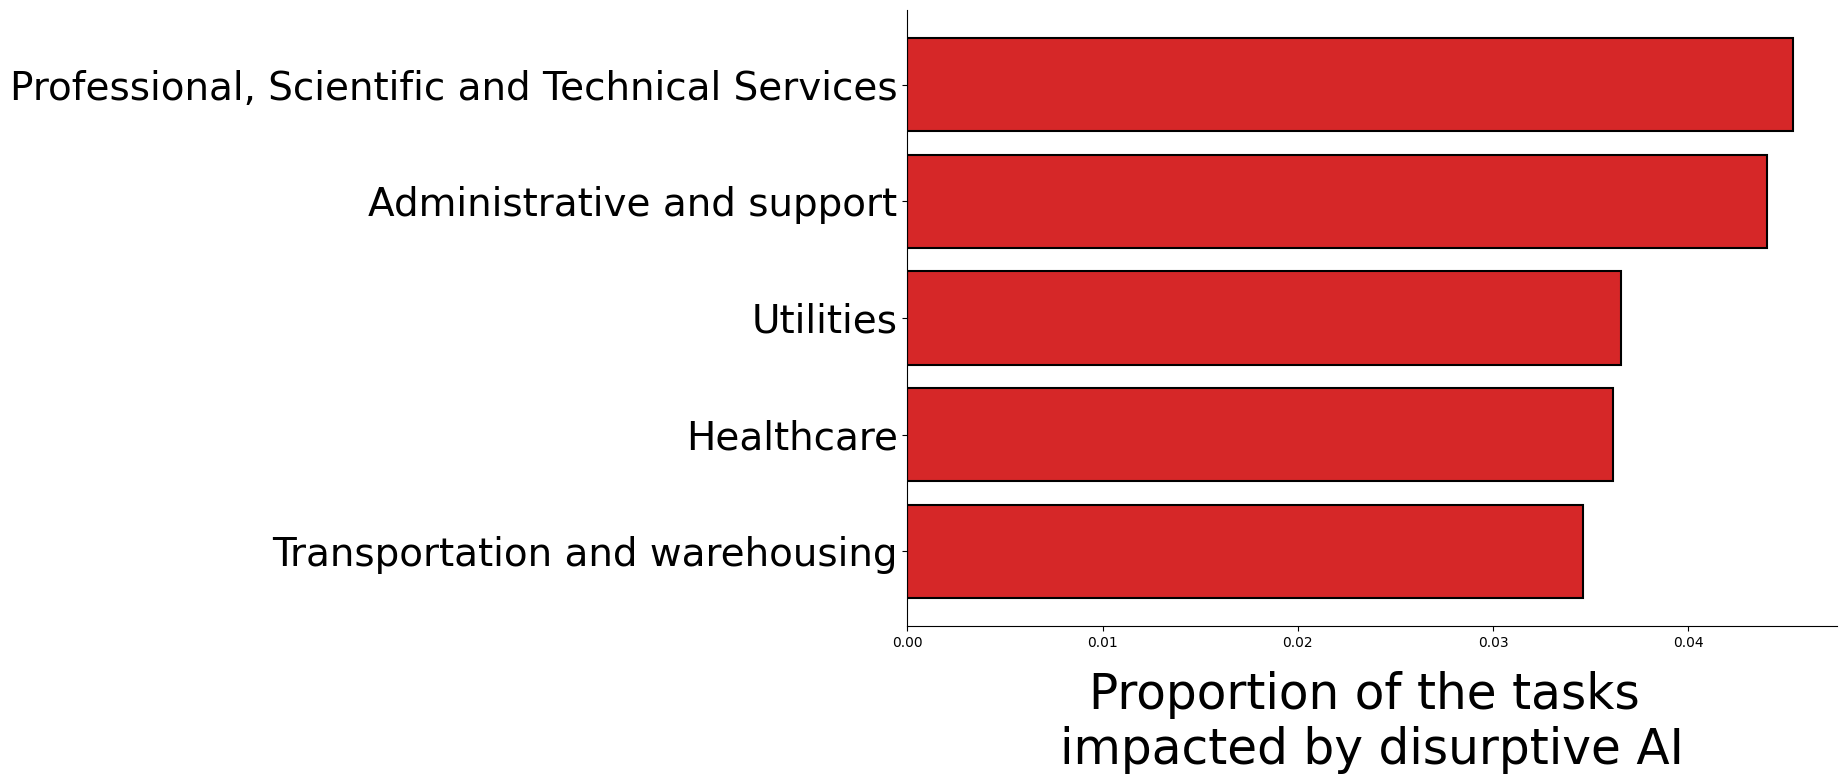

In [129]:
import matplotlib.pyplot as plt

# Set the style to a more professional one
plt.style.use('default')

# Define a color in a fancy red scheme
fancy_red = '#D62728'  # This is a deep red color that is often used in high-quality visualizations

# Create the figure and axis
plt.figure(figsize=(12, 8))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Plot the data
# ranked_difference['Disruptive_Proportion'][:5].sort_values(ascending=True).plot(kind='barh', color=fancy_red, edgecolor='black', linewidth=1.5)


top5 = ranked_difference.nlargest(5, 'Disruptive_Proportion').sort_values('Disruptive_Proportion')

plt.barh(
    y=range(len(top5)),
    width=top5['Disruptive_Proportion'],
    color=fancy_red,
    edgecolor='black',
    linewidth=1.5
)

plt.yticks(range(len(top5)),top5['task_industry'], fontsize=28)

# Add labels and titles with larger font sizes
plt.xlabel('Proportion of the tasks \nimpacted by disurptive AI', fontsize=35, labelpad=15)
# plt.xticks([0, 0.1, 0.2, 0.3, 0.4,0.5], fontsize=28)
# plt.yticks([4,3,2,1,0],['Administrative and Support Services','Information','Finance and Insurance','Education Services','Professional, Scientific and Technical Services'], fontsize=40)
plt.ylabel('')

# Adjust the layout and font for the title
# plt.title('Top 5 Industries with the Highest Proportional Increase in Tasks Impacted by Disruptive AI Compared to General AI', fontsize=24, pad=20)

# Save the figure with a higher DPI for better quality
# plt.savefig('Top5_Disruptive_Industry_Tasks.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()


In [102]:
# Rank the difference by sorting the values
ranked_difference = industry_counts.sort_values(by='Consolidating_Proportion', ascending=False)



In [103]:
ranked_difference

,task_industry,count,Disruptive_Proportion,Consolidating_Proportion,Notexposed_Proportion,Exposed_Proportion
16,Mining,118,0.008475,0.067797,0.881356,0.118644
0,Manufacturing,2539,0.026388,0.053958,0.838125,0.161875
7,"Professional, Scientific and Technical Services",551,0.045372,0.049002,0.818512,0.181488
2,Health care and social assistance,1827,0.036125,0.047619,0.819376,0.180624
5,Transportation and warehousing,693,0.034632,0.043290,0.845599,0.154401
13,Utilities,301,0.036545,0.039867,0.843854,0.156146
14,"Agriculture, forestry, fishing and hunting",253,0.003953,0.039526,0.897233,0.102767
4,Construction,785,0.017834,0.035669,0.915924,0.084076
11,Information,354,0.033898,0.028249,0.918079,0.081921
17,Wholesale trade,71,0.014085,0.028169,0.929577,0.070423


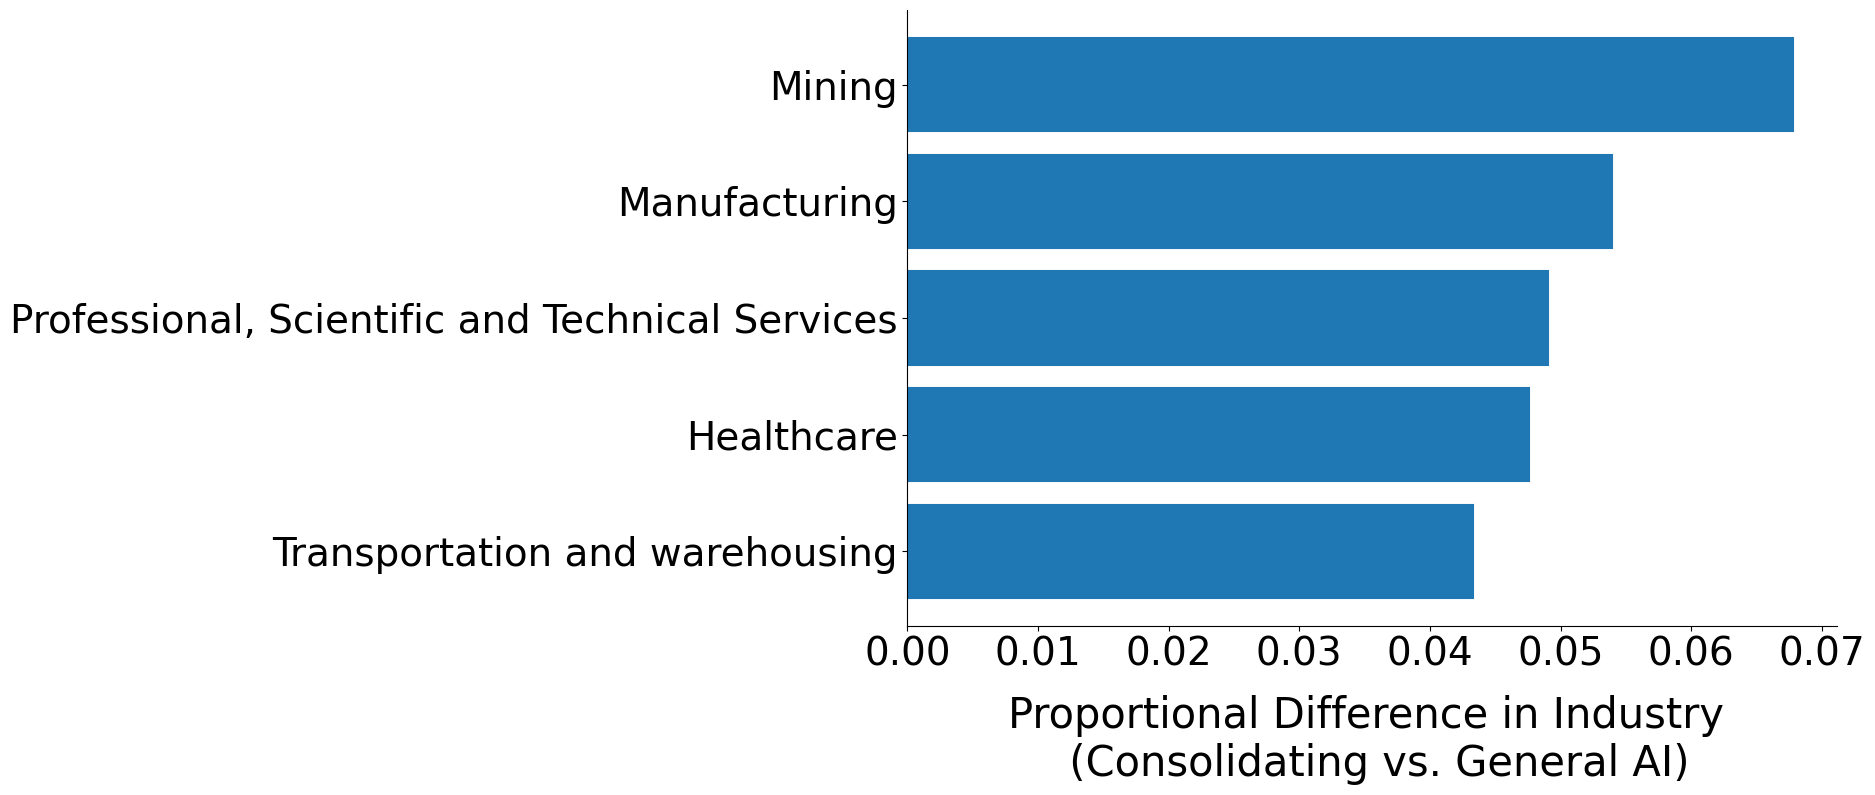

In [183]:
import matplotlib.pyplot as plt

# Set the style to a more professional one
plt.style.use('default')


['Manufacturing',
'Construction',                                                           
'Mining',                                                 
'Agriculture, forestry, fishing and hunting',
'Retail Trade' ]


# Create the figure and axis
plt.figure(figsize=(12, 8))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Plot the data
# ranked_difference[:5].sort_values(ascending=True).plot(kind='barh', color='#1f77b4', edgecolor='black', linewidth=1.5)


top5 = ranked_difference.nlargest(5, 'Consolidating_Proportion').sort_values('Consolidating_Proportion')

plt.barh(
    y=range(len(top5)),
    width=top5['Consolidating_Proportion'],
    color='#1f77b4',
    edgecolor='#1f77b4',
    linewidth=1.5
)

plt.yticks(range(len(top5)),top5['task_industry'], fontsize=28)

# Add labels and titles with larger font sizes
plt.xlabel('Proportional Difference in Industry \n (Consolidating vs. General AI)', fontsize=30, labelpad=15)
plt.xticks([0, 0.01, 0.02, 0.03, 0.04,0.05,0.06,0.07], fontsize=28)
# plt.yticks([4,3,2,1,0],['Manufacturing',
# 'Construction',                                                           
# 'Mining',                                                 
# 'Agriculture',
# 'Retail Trade' ], fontsize=40)
plt.ylabel('')

# Adjust the layout and font for the title
# plt.title('Top 5 Industries with the Highest Proportional Increase in Tasks Impacted by Disruptive AI Compared to General AI', fontsize=24, pad=20)

# Save the figure with a higher DPI for better quality
# plt.savefig('Top5_Consolidating_Industry_Tasks.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()


# proportion within disruptive - proportion within exposed

In [216]:
# Raw counts
counts_exposed = tasks_exposedai['task_industry'].value_counts()
counts_disruptive = disruptive_tasks['task_industry'].value_counts()

# Total sample sizes
n_all = len(tasks_exposedai)
n_disruptive = len(disruptive_tasks)


from statsmodels.stats.proportion import proportions_ztest

results = []

for industry in set(disruptive_tasks['task_industry']):
    count1 = counts_disruptive.get(industry, 0)       # tasks in this industry (disruptive)
    count2 = counts_exposed.get(industry, 0  )                # tasks in this industry (all AI)
    if industry !=industry:
        continue
    industry_n = sector_name[industry]
    n1 = len(disruptive_tasks)
#     int(industry_counts_exposedai[industry])
    n2=len(tasks_exposedai)
#     print(count1, n1)

    stat, pval = proportions_ztest([count1, count2], [n1, n2])
    
    results.append({
        'industry': industry,
        'prop_disruptive': count1 / n1,
        'prop_exposed': count2 / n2,
        'count': n1,
        'z_stat': stat,
        'p_value': pval
    })




In [218]:
results = pd.DataFrame(results)
results

,industry,prop_disruptive,prop_exposed,count,z_stat,p_value
0,Utilities,0.027708,0.024103,397,0.421761,0.673199
1,Mining,0.002519,0.007179,397,-1.062186,0.288151
2,Retail trade,0.022670,0.023590,397,-0.110417,0.912079
3,"Agriculture, forestry, fishing and hunting",0.002519,0.013333,397,-1.841821,0.065501
4,"Arts, entertainment, and recreation",0.007557,0.010769,397,-0.579949,0.561949
5,"Other services, except public administration",0.015113,0.016923,397,-0.257118,0.797088
6,"Professional, Scientific and Technical Services",0.062972,0.051282,397,0.945509,0.344399
7,Administrative and support and waste managemen...,0.017632,0.007692,397,1.873397,0.061014
8,Public administration,0.052897,0.049744,397,0.262069,0.793268
9,Information,0.030227,0.014872,397,2.128603,0.033287


In [219]:
# Raw counts
counts_exposed = tasks_exposedai['task_industry'].value_counts()
counts_disruptive = consolidating_tasks['task_industry'].value_counts()

# Total sample sizes
n_all = len(tasks_exposedai)
n_disruptive = len(disruptive_tasks)


from statsmodels.stats.proportion import proportions_ztest

results = []

for industry in set(disruptive_tasks['task_industry']):
    count1 = counts_disruptive.get(industry, 0)       # tasks in this industry (disruptive)
    count2 = counts_exposed.get(industry, 0  )                # tasks in this industry (all AI)
    if industry !=industry:
        continue
    industry_n = sector_name[industry]
    n1 = len(consolidating_tasks)
#     int(industry_counts_exposedai[industry])
    n2=len(tasks_exposedai)
#     print(count1, n1)

    stat, pval = proportions_ztest([count1, count2], [n1, n2])
    
    results.append({
        'industry': industry,
        'prop_consolidating': count1 / n1-count2 / n2,
        'prop_exposed': count2 / n2,
        'count': n1,
        'z_stat': stat,
        'p_value': pval
    })




In [220]:
results = pd.DataFrame(results)
results

,industry,prop_consolidating,prop_exposed,count,z_stat,p_value
0,Utilities,-0.001715,0.024103,536,-0.230955,0.817350
1,Mining,0.007746,0.007179,536,1.695859,0.089913
2,Retail trade,0.004395,0.023590,536,0.582534,0.560207
3,"Agriculture, forestry, fishing and hunting",0.005323,0.013333,536,0.913700,0.360874
4,"Arts, entertainment, and recreation",-0.008904,0.010769,536,-1.949316,0.051258
5,"Other services, except public administration",-0.000132,0.016923,536,-0.021007,0.983240
6,"Professional, Scientific and Technical Services",-0.000909,0.051282,536,-0.084646,0.932542
7,Administrative and support and waste managemen...,-0.003961,0.007692,536,-0.985522,0.324368
8,Public administration,-0.006833,0.049744,536,-0.653691,0.513311
9,Information,0.003785,0.014872,536,0.624537,0.532275


In [211]:
# Raw counts
counts_consolidating= consolidating_tasks['task_industry'].value_counts()
counts_disruptive = disruptive_tasks['task_industry'].value_counts()

# Total sample sizes
n_all = len(tasks_exposedai)
n_disruptive = len(disruptive_tasks)


from statsmodels.stats.proportion import proportions_ztest

results = []

for industry in set(disruptive_tasks['task_industry']):
    count1 = counts_disruptive.get(industry, 0)       # tasks in this industry (disruptive)
    count2 = counts_consolidating.get(industry, 0  )                # tasks in this industry (all AI)
    if industry !=industry:
        continue
    industry_n = sector_name[industry]
    n1 = len(disruptive_tasks)
#     int(industry_counts_exposedai[industry])
    n2=len(consolidating_tasks)
#     print(count1, n1)

    stat, pval = proportions_ztest([count1, count2], [n1, n2])
    
    results.append({
        'industry': industry,
        'prop_disruptive': count1 / n1-count2 / n2,
        'prop_exposed': count2 / n2,
        'count': n1,
        'z_stat': stat,
        'p_value': pval
    })




In [212]:
len(disruptive_tasks),len(consolidating_tasks)

(397, 536)

In [213]:
results = pd.DataFrame(results)
results

,industry,prop_disruptive,prop_exposed,count,z_stat,p_value
0,Utilities,0.005320,0.022388,397,0.518114,0.604379
1,Mining,-0.012406,0.014925,397,-1.916946,0.055245
2,Retail trade,-0.005315,0.027985,397,-0.507035,0.612130
3,"Agriculture, forestry, fishing and hunting",-0.016138,0.018657,397,-2.257884,0.023953
4,"Arts, entertainment, and recreation",0.005691,0.001866,397,1.315435,0.188364
5,"Other services, except public administration",-0.001678,0.016791,397,-0.201449,0.840348
6,"Professional, Scientific and Technical Services",0.012599,0.050373,397,0.829412,0.406871
7,Administrative and support and waste managemen...,0.013901,0.003731,397,2.147851,0.031726
8,Public administration,0.009986,0.042910,397,0.711451,0.476805
9,Information,0.011570,0.018657,397,1.151544,0.249508


In [214]:

industry_counts_disruptive = disruptive_tasks['task_industry'].value_counts(normalize=True).reset_index()
industry_counts_consolidating = consolidating_tasks['task_industry'].value_counts(normalize=True).reset_index()


In [218]:
industry_counts_disruptive.columns = ['task_industry', 'Disruptive_Proportion']
industry_counts_consolidating.columns = ['task_industry', 'Consolidating_Proportion']

In [219]:
# industry_counts_disruptive['Proportion'] = np.log(industry_counts_disruptive['Proportion'])

In [220]:
# industry_counts_consolidating['Proportion'] = np.log(industry_counts_consolidating['Proportion'])

In [294]:
def cal_correlation(year,industry_scores,type_name):
    year_mask = df["year"].eq(year)
    rate_mask = df["series_id"].str.endswith("R")
    month_mask = df["period"].eq("M13")
    seasonal_mask = df["series_id"].str[2] == "U"
    agg_mask = (
        (df["naics_code"].str.endswith("0000") | df["naics_code"].str.endswith("0099"))
        & ~df["naics_code"].eq("000000")
        & ~df["naics_code"].eq("100000")
    )
    vacancy_rates = (
        df[year_mask & rate_mask & month_mask & seasonal_mask & agg_mask]
        .reset_index(drop=True)
        .copy()
    )

    vacancy_rates["sector_code"] = vacancy_rates["naics_code"].str.slice(0, 2).astype(int)
    vacancy_rates["sector_name"] = vacancy_rates["naics_code"].map(naics_mapping_jt)

    vacancy_rates = vacancy_rates.dropna(subset="sector_name")
    if type_name == 'disruptive':
        col_name = 'Disruptive_Proportion'
    else:

        col_name = 'Consolidating_Proportion'
    jolts = pd.merge(
        vacancy_rates,
        industry_scores,
        how="left",
        left_on="sector_name",
        right_on="task_industry",
    ).dropna(subset=col_name)
    
    jd = jolts[
    ~jolts["sector_name"].isin(
        [
            # "Construction",
#             "Arts, entertainment, and recreation",
                "Accommodation and food services"
            ]
        )
    ]
    # jd = jolts
    
    x = jolts[col_name]
    y = jolts["value"]
    slope, intercept, *_ = linregress(x, y)
    y_pred = intercept + slope * x
    residuals = y - y_pred
    resid_std = residuals.std()

    # Mark points within ±2 std deviations
    mask_inlier = residuals.abs() <= 2 * resid_std
    
    
    outliers = jolts[~mask_inlier]
    print(outliers["sector_name"].unique())
    rho, pval = pearsonr(jd[col_name], jd["value"])
    sns.regplot(x=col_name, y="value", data=jd)
    plt.title(f"Pearson's r = {rho:.2f} ($p = {pval:.2f}$)",size=15)
    print(jolts["sector_name"].unique())
#     for sector in jolts["sector_name"].unique():
#         try:
#             sector_data = jd[jd["sector_name"].eq(sector)].iloc[0]

#             if sector.startswith("Health"):
#                 sector = "Healthcare"
#             elif sector.startswith("Accomm"):
#                 sector = "Accommodation"
#             elif sector.startswith("Arts"):
#                 sector = "Arts & entertainment"

#             plt.annotate(sector, (sector_data[col_name]+ 0.001, sector_data["value"] + 0.1))
#         except:
#             pass
    plt.xlabel(f"Proportion of tasks impacted by {type_name} AI",size=15)
    plt.ylabel("Vacancy rate",size=15)
    plt.gca().xaxis.set_major_locator(mtick.FixedLocator([0.00, 0.01, 0.02, 0.03, 0.04]))
# plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    sns.despine()
    plt.savefig(f"../results/figures/vacancy-sector-{type_name}_{year}.pdf", bbox_inches="tight")
    
    
    

['Accommodation and food services']
['Mining' 'Construction' 'Manufacturing' 'Wholesale trade' 'Retail trade'
 'Transportation and warehousing' 'Information' 'Finance and insurance'
 'Professional, Scientific and Technical Services' 'Education services'
 'Health care and social assistance' 'Arts, entertainment, and recreation'
 'Accommodation and food services'
 'Other services, except public administration' 'Public administration']


IndexError: single positional indexer is out-of-bounds

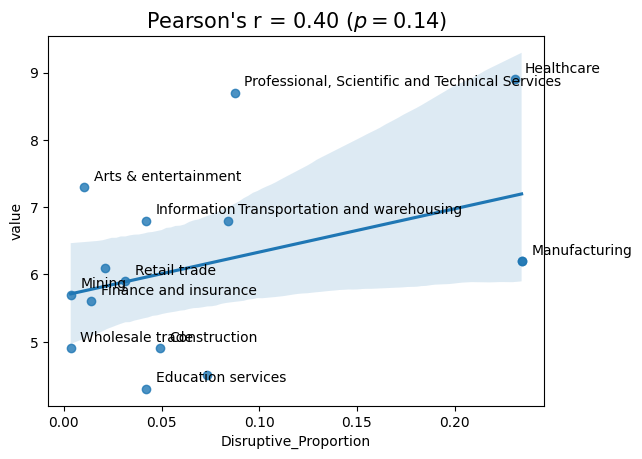

In [224]:
cal_correlation(2022,industry_counts_disruptive,'disruptive')

['Accommodation and food services']
['Mining' 'Construction' 'Manufacturing' 'Wholesale trade' 'Retail trade'
 'Transportation and warehousing' 'Information' 'Finance and insurance'
 'Professional, Scientific and Technical Services' 'Education services'
 'Health care and social assistance' 'Arts, entertainment, and recreation'
 'Accommodation and food services'
 'Other services, except public administration' 'Public administration']


IndexError: single positional indexer is out-of-bounds

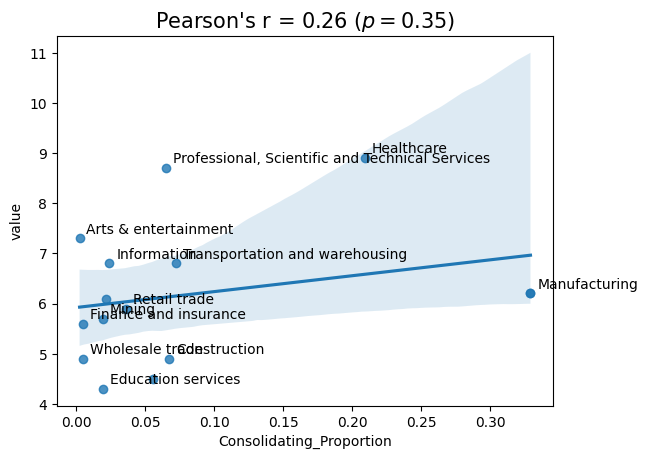

In [225]:
cal_correlation(2022,industry_counts_consolidating,'consolidating')

['Accommodation and food services']
['Mining' 'Construction' 'Manufacturing' 'Wholesale trade' 'Retail trade'
 'Transportation and warehousing' 'Information' 'Finance and insurance'
 'Professional, Scientific and Technical Services' 'Education services'
 'Health care and social assistance' 'Arts, entertainment, and recreation'
 'Accommodation and food services'
 'Other services, except public administration' 'Public administration']


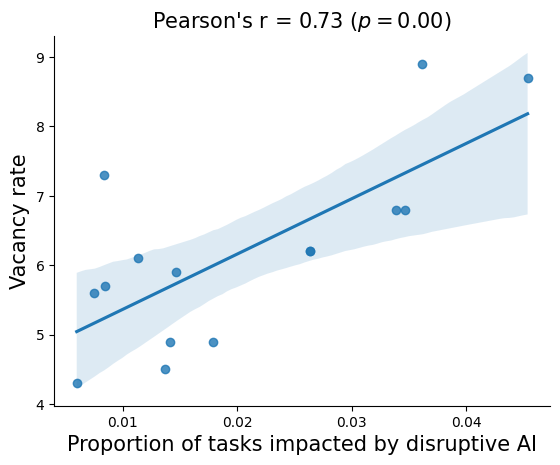

In [295]:
cal_correlation(2022,industry_counts,'disruptive')

In [296]:
industry_counts

,task_industry,count,Disruptive_Proportion,Consolidating_Proportion,Notexposed_Proportion
0,Manufacturing,2539,0.026388,0.053958,0.838125
1,Education services,2013,0.005961,0.003974,0.978142
2,Health care and social assistance,1827,0.036125,0.047619,0.819376
3,Public administration,1532,0.013708,0.015013,0.936684
4,Construction,785,0.017834,0.035669,0.915924
5,Transportation and warehousing,693,0.034632,0.043290,0.845599
6,Retail trade,614,0.014658,0.024430,0.925081
7,"Professional, Scientific and Technical Services",551,0.045372,0.049002,0.818512
8,Finance and insurance,533,0.007505,0.003752,0.979362
9,"Other services, except public administration",532,0.011278,0.016917,0.937970


['Accommodation and food services']
['Mining' 'Construction' 'Manufacturing' 'Wholesale trade' 'Retail trade'
 'Transportation and warehousing' 'Information' 'Finance and insurance'
 'Professional, Scientific and Technical Services' 'Education services'
 'Health care and social assistance' 'Arts, entertainment, and recreation'
 'Accommodation and food services'
 'Other services, except public administration' 'Public administration']


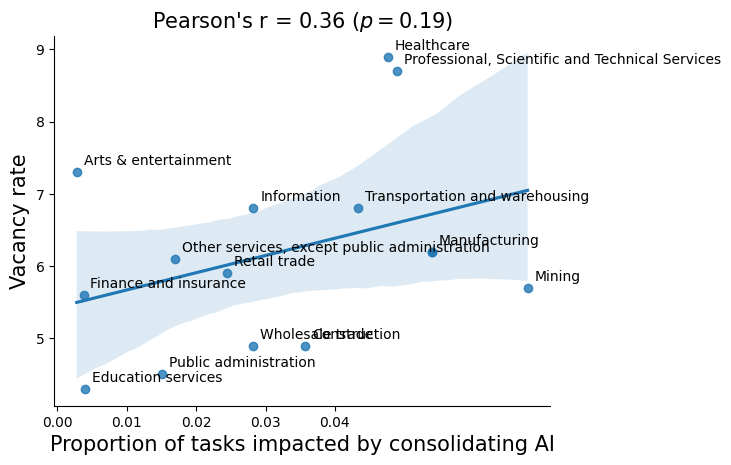

In [288]:
cal_correlation(2022,industry_counts,'consolidating')

In [13]:


def compute_industry_scores(occupations, jobs_aii, year=None):
    # Filter for NAICS sectors and valid percentages
    data = occupations[
        (occupations["Item"] == "NAICS Sector") &
        (occupations["Percent"] != "n/a")
    ].copy()

    # Convert 'Percent' to float
    data["Percent"] = data["Percent"].astype(float)

    # Merge with jobs_aii on occupation code
    data = pd.merge(data, jobs_aii, on="O*NET-SOC Code")

    # Keep only entries where more than 50% of workers are in that sector
    data = data[data["Percent"] > 50]

    # Calculate weighted score
    data["score"] = data["Percent"] * data["aii"]

    # Group by industry sector (i.e., "Response") and aggregate
    grouped = (
        data.groupby("Response")
        .agg(score=("score", "sum"), Percent=("Percent", "sum"))
        .reset_index()
    )

    # Remove unclassified entries
    grouped = grouped[grouped["Response"] != "Unclassified"]

    # Sort by score
    grouped = grouped.sort_values("score")

    # Apply conservative Bayesian estimate of aii
    grouped["aii"] = beta(1 + grouped["score"], 9 + grouped["Percent"] - grouped["score"]).ppf(0.25)
    grouped["aii_std"] = beta(1 + grouped["score"], 9 + grouped["Percent"] - grouped["score"]).std()

    # Optionally add year column
    if year:
        grouped["year"] = year

    return grouped

In [14]:
sector_name = {
    "Accommodation and food services": "Accommodation and food services",
    "Administrative and support and waste management and remediation services": "Waste management",
    "Agriculture, forestry, fishing and hunting": "Agriculture",
    "Arts, entertainment, and recreation": "Arts and entertainment",
    "Construction": "Construction",
    "Education services": "Education",
    "Finance and insurance": "Finance and insurance",
    "Health care and social assistance": "Healthcare",
    "Information": "Information technology",
    "Manufacturing": "Manufacturing",
    "Mining": "Mining",
    "Other services, except public administration": "Other services",
    "Professional, Scientific and Technical Services": "Scientific and technical services",
    "Public administration": "Public administration",
    "Real estate and rental and leasing": "Real estate",
    "Retail trade": "Retail trade",
    "Transportation and warehousing": "Transportation",
    "Utilities": "Utilities",
    "Wholesale trade": "Wholesale trade",
}

In [15]:
naics_mapping_jt = {
    "110099": "Mining",
    "230000": "Construction",
    "320000": "Manufacturing",
    "340000": "Manufacturing",
    "420000": "Wholesale trade",
    "440000": "Retail trade",
    "480099": "Transportation and warehousing",
    "510000": "Information",
    "510099": "Financial activities",
    "520000": "Finance and insurance",
    "530000": "Real estate and rental and leasing",
    "540099": "Professional, Scientific and Technical Services",
    "610000": "Education services",
    "620000": "Health care and social assistance",
    "710000": "Arts, entertainment, and recreation",
    "720000": "Accommodation and food services",
    "810000": "Other services, except public administration",
    "920000": "Public administration",
}

In [16]:
import matplotlib.ticker as mtick
from scipy.stats import pearsonr, linregress

In [17]:
def cal_correlation(year,industry_scores,type_name):
    year_mask = df["year"].eq(year)
    rate_mask = df["series_id"].str.endswith("R")
    month_mask = df["period"].eq("M13")
    seasonal_mask = df["series_id"].str[2] == "U"
    agg_mask = (
        (df["naics_code"].str.endswith("0000") | df["naics_code"].str.endswith("0099"))
        & ~df["naics_code"].eq("000000")
        & ~df["naics_code"].eq("100000")
    )
    vacancy_rates = (
        df[year_mask & rate_mask & month_mask & seasonal_mask & agg_mask]
        .reset_index(drop=True)
        .copy()
    )

    vacancy_rates["sector_code"] = vacancy_rates["naics_code"].str.slice(0, 2).astype(int)
    vacancy_rates["sector_name"] = vacancy_rates["naics_code"].map(naics_mapping_jt)

    vacancy_rates = vacancy_rates.dropna(subset="sector_name")
    
    jolts = pd.merge(
        vacancy_rates,
        industry_scores,
        how="left",
        left_on="sector_name",
        right_on="Response",
    ).dropna(subset="aii")
    
    jd = jolts[
    ~jolts["sector_name"].isin(
        [
            # "Construction",
#             "Arts, entertainment, and recreation",
                "Accommodation and food services"
            ]
        )
    ]
    # jd = jolts
    
    x = jolts["aii"]
    y = jolts["value"]
    slope, intercept, *_ = linregress(x, y)
    y_pred = intercept + slope * x
    residuals = y - y_pred
    resid_std = residuals.std()

    # Mark points within ±2 std deviations
    mask_inlier = residuals.abs() <= 2 * resid_std
    
    
    outliers = jolts[~mask_inlier]
    print(outliers["sector_name"].unique())
    rho, pval = pearsonr(jd["aii"], jd["value"])
    sns.regplot(x="aii", y="value", data=jd)
    plt.title(f"Pearson's r = {rho:.2f} ($p = {pval:.2f}$)",size=15)
    
#     for sector in naics_mapping_jt.values():
#         try:
#             sector_data = jd[jd["sector_name"].eq(sector)].iloc[0]

#             if sector.startswith("Health"):
#                 sector = "Healthcare"
#             elif sector.startswith("Accomm"):
#                 sector = "Accommodation"
#             elif sector.startswith("Arts"):
#                 sector = "Arts & entertainment"

#             plt.annotate(sector, (sector_data["aii"]+ 0.005, sector_data["value"] + 0.1))
#         except:
#             pass
    plt.xlabel(f"AII by {type_name} AI",size=15)
    plt.ylabel("Vacancy rate",size=15)
    plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    sns.despine()
    plt.savefig(f"../results/figures/vacancy-sector-{type_name}_{year}.pdf", bbox_inches="tight")
    
    
    

## Tasks Impacted by Disruptive Patents

In [18]:
jobs_aii = (
    tasks.groupby('O*NET-SOC Code')
    .agg(
        aii=('s_disruptive', 'mean'),
        nb_impacted_tasks=('s_disruptive', 'sum'),
        total_tasks=('s_disruptive', 'count')
    )
    .reset_index()
)

In [19]:
jobs_aii['aii'] = jobs_aii['nb_impacted_tasks'] / jobs_aii['total_tasks']

In [20]:
sector_aii = compute_industry_scores(occupations, jobs_aii)

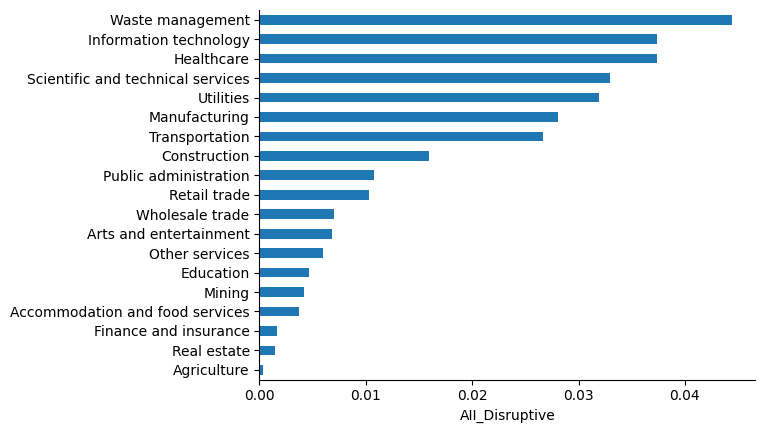

In [21]:
industry_scores = compute_industry_scores(occupations, jobs_aii)
industry_scores.set_index("Response").rename(sector_name).aii.sort_values().plot.barh()
plt.xlabel("AII_Disruptive")
plt.ylabel("")
sns.despine()

['Accommodation and food services']


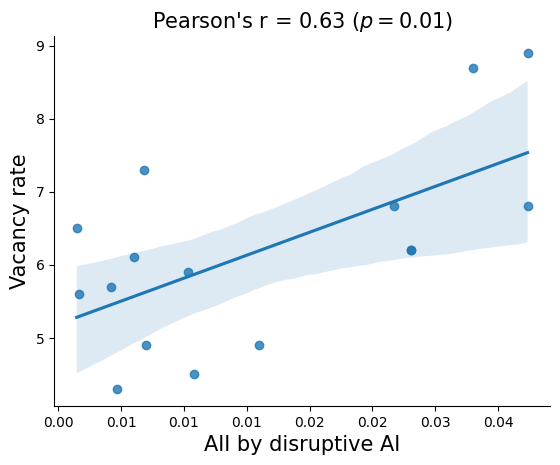

In [22]:
cal_correlation(2022,industry_scores,'disruptive')

## Tasks Impacted by Consolidating Patents

In [23]:
jobs_aii = (
    tasks.groupby('O*NET-SOC Code')
    .agg(
        aii=('s_consolidating', 'mean'),
        nb_impacted_tasks=('s_consolidating', 'sum'),
        total_tasks=('s_consolidating', 'count')
    )
    .reset_index()
)

In [24]:
jobs_aii['aii'] = jobs_aii['nb_impacted_tasks'] / jobs_aii['total_tasks']

In [25]:
sector_aii = compute_industry_scores(occupations, jobs_aii)

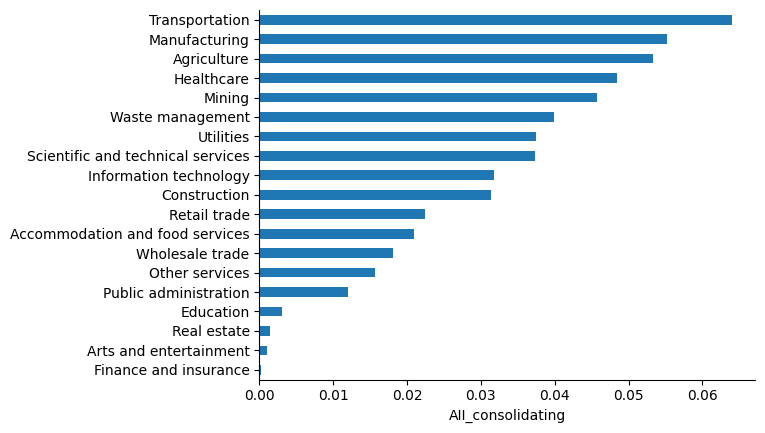

In [26]:
industry_scores = compute_industry_scores(occupations, jobs_aii)
industry_scores.set_index("Response").rename(sector_name).aii.sort_values().plot.barh()
plt.xlabel("AII_consolidating")
plt.ylabel("")
sns.despine()

['Accommodation and food services']


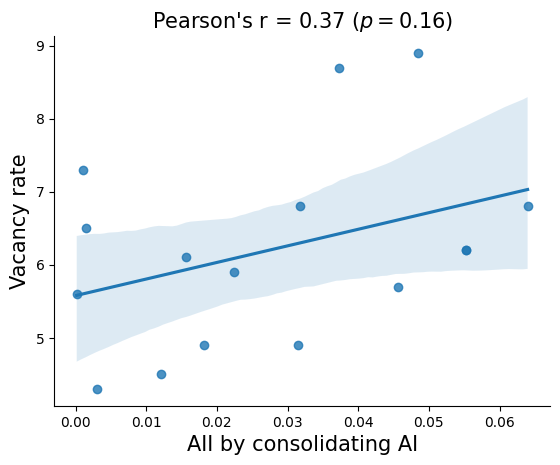

In [28]:
cal_correlation(2022,industry_scores,'consolidating')